In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
style.use('ggplot')
import re

In [2]:
num_cores=[2,4,8,16,32,56,64,96,120]

In [3]:
# Extracting times per run for each file (Thread number)
prom=[]
data = dict()
for i in num_cores:
    file=open("Run"+str(i)+".out")
    data[str(i)]=[]
    for line in file:
        if line.startswith('Run'):
            data[str(i)].append(int(line.split()[-2]))
    prom.append(np.mean(data[str(i)]))
    file.close()
print(prom)
        

[452.6, 323.0, 275.2, 263.6, 259.2, 221.0, 188.0, 304.8, 321.6]


In [4]:
df = pd.DataFrame (data)
df.to_csv(r'Execution_table.csv', index = True)
df

,2,4,8,16,32,56,64,96,120
0,461,314,274,259,250,221,188,309,331
1,483,320,272,264,261,228,190,298,325
2,464,338,279,263,261,218,193,305,318
3,436,333,274,264,259,219,184,303,323
4,419,310,277,268,265,219,185,309,311


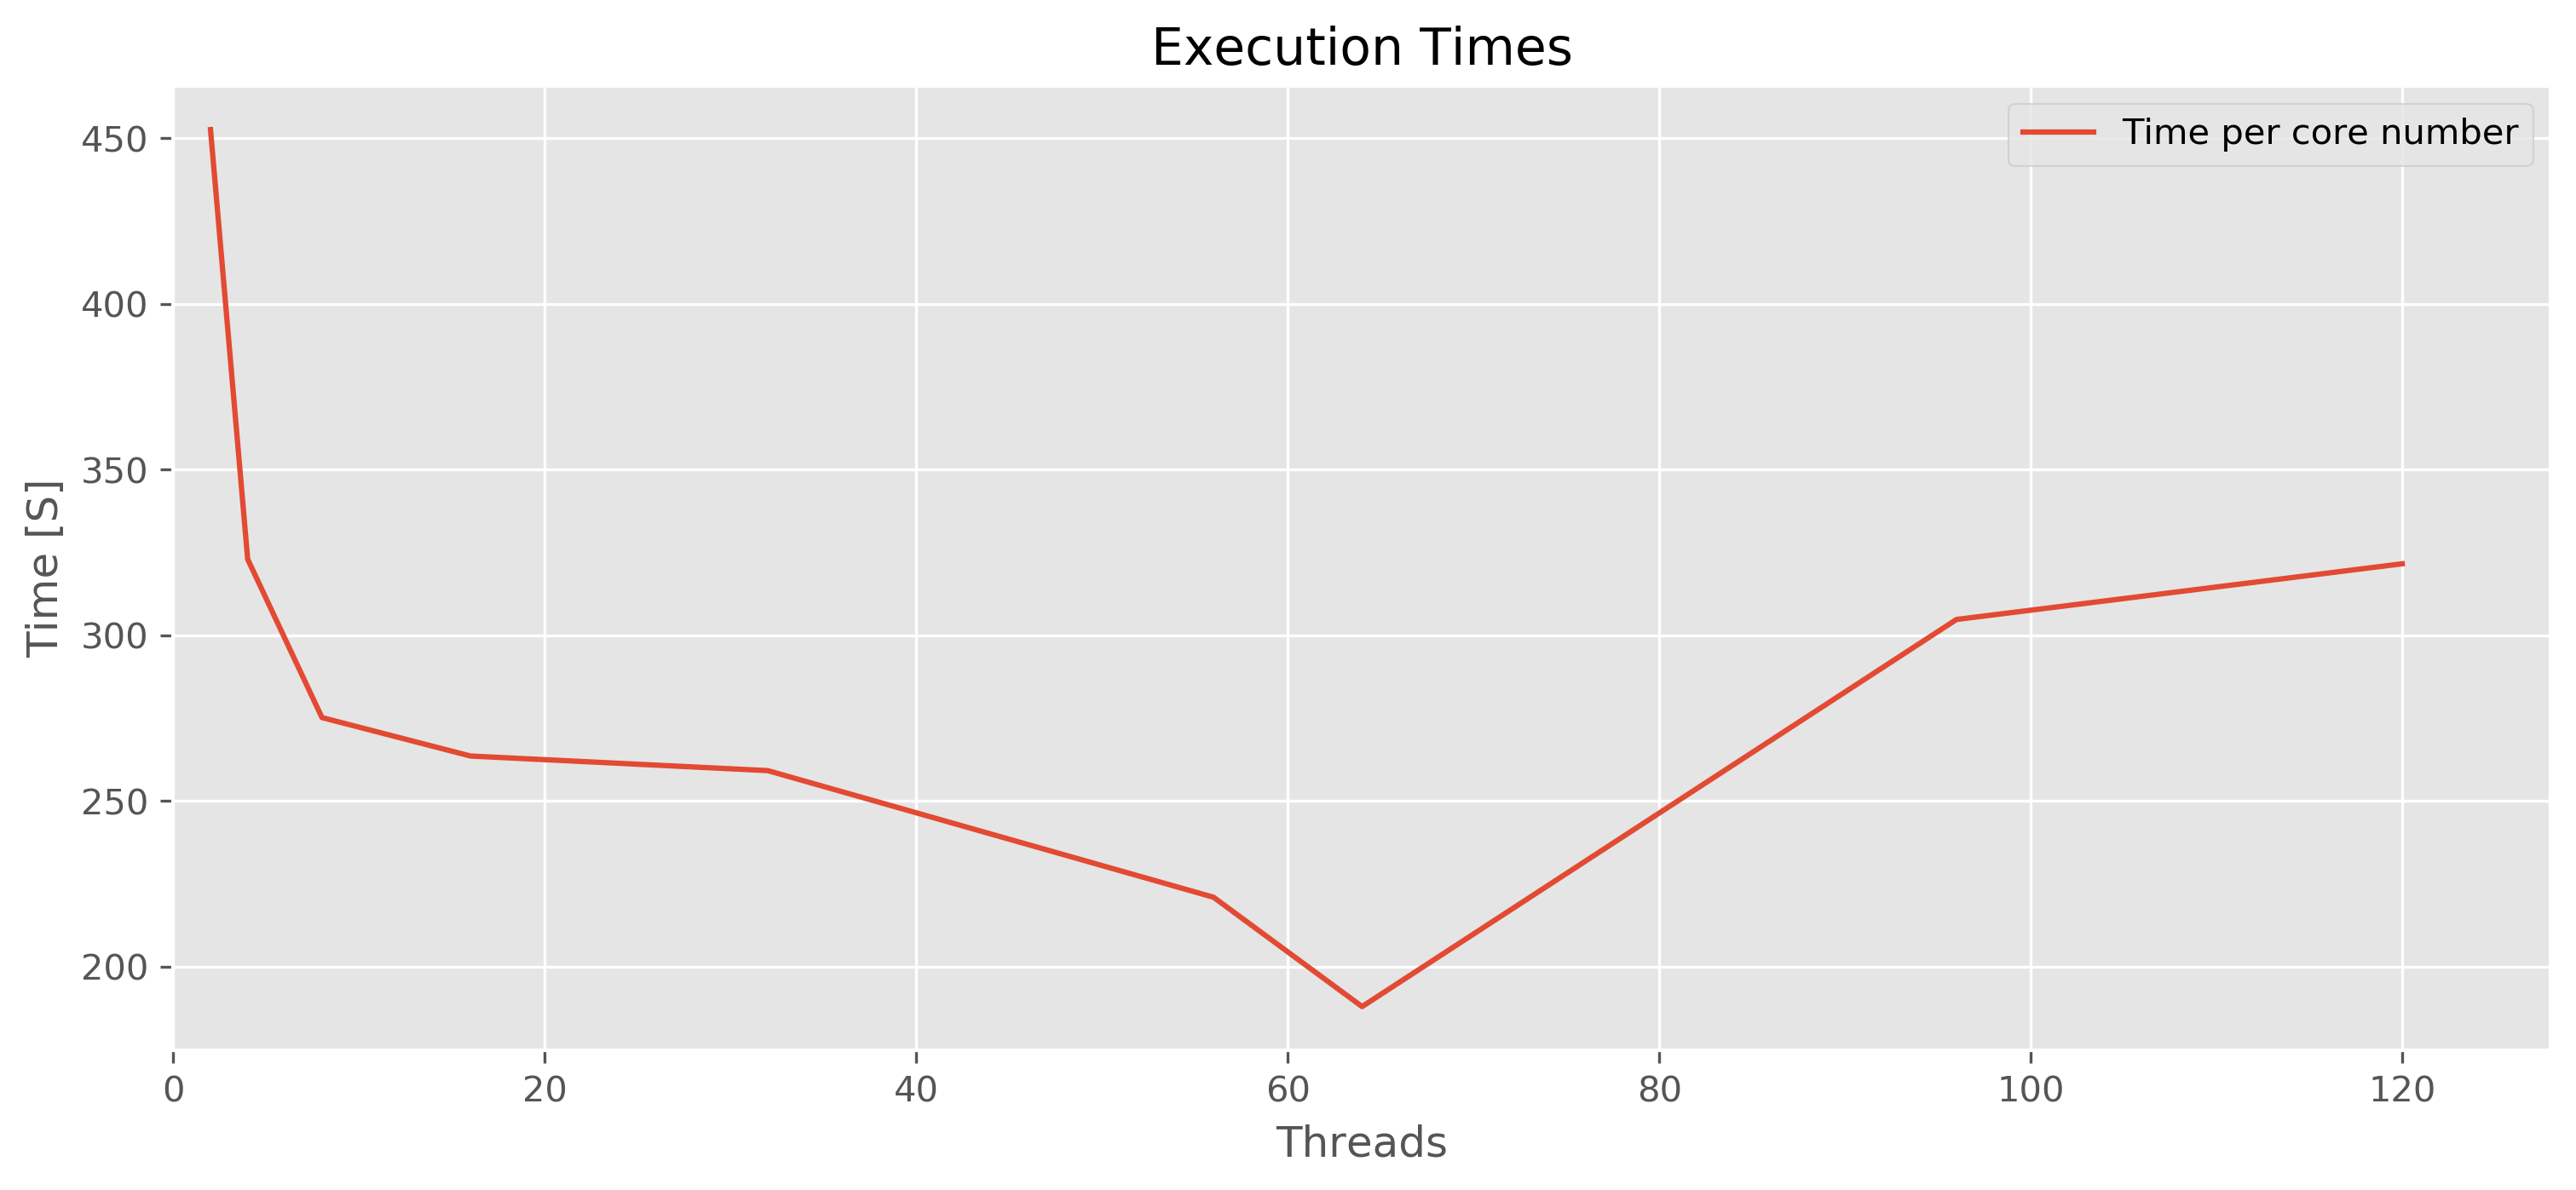

In [5]:
#Execution time graphic
plt.figure(figsize=(12, 5), dpi=300, facecolor='w', edgecolor='k')
plt.plot(num_cores,prom,label="Time per core number")
plt.xlim(0,128)
plt.title("Execution Times");
plt.xlabel("Threads");
plt.ylabel("Time [S]");
plt.legend();

In [6]:
plt.savefig('ExeTimes.png', dpi=300)

<Figure size 432x288 with 0 Axes>

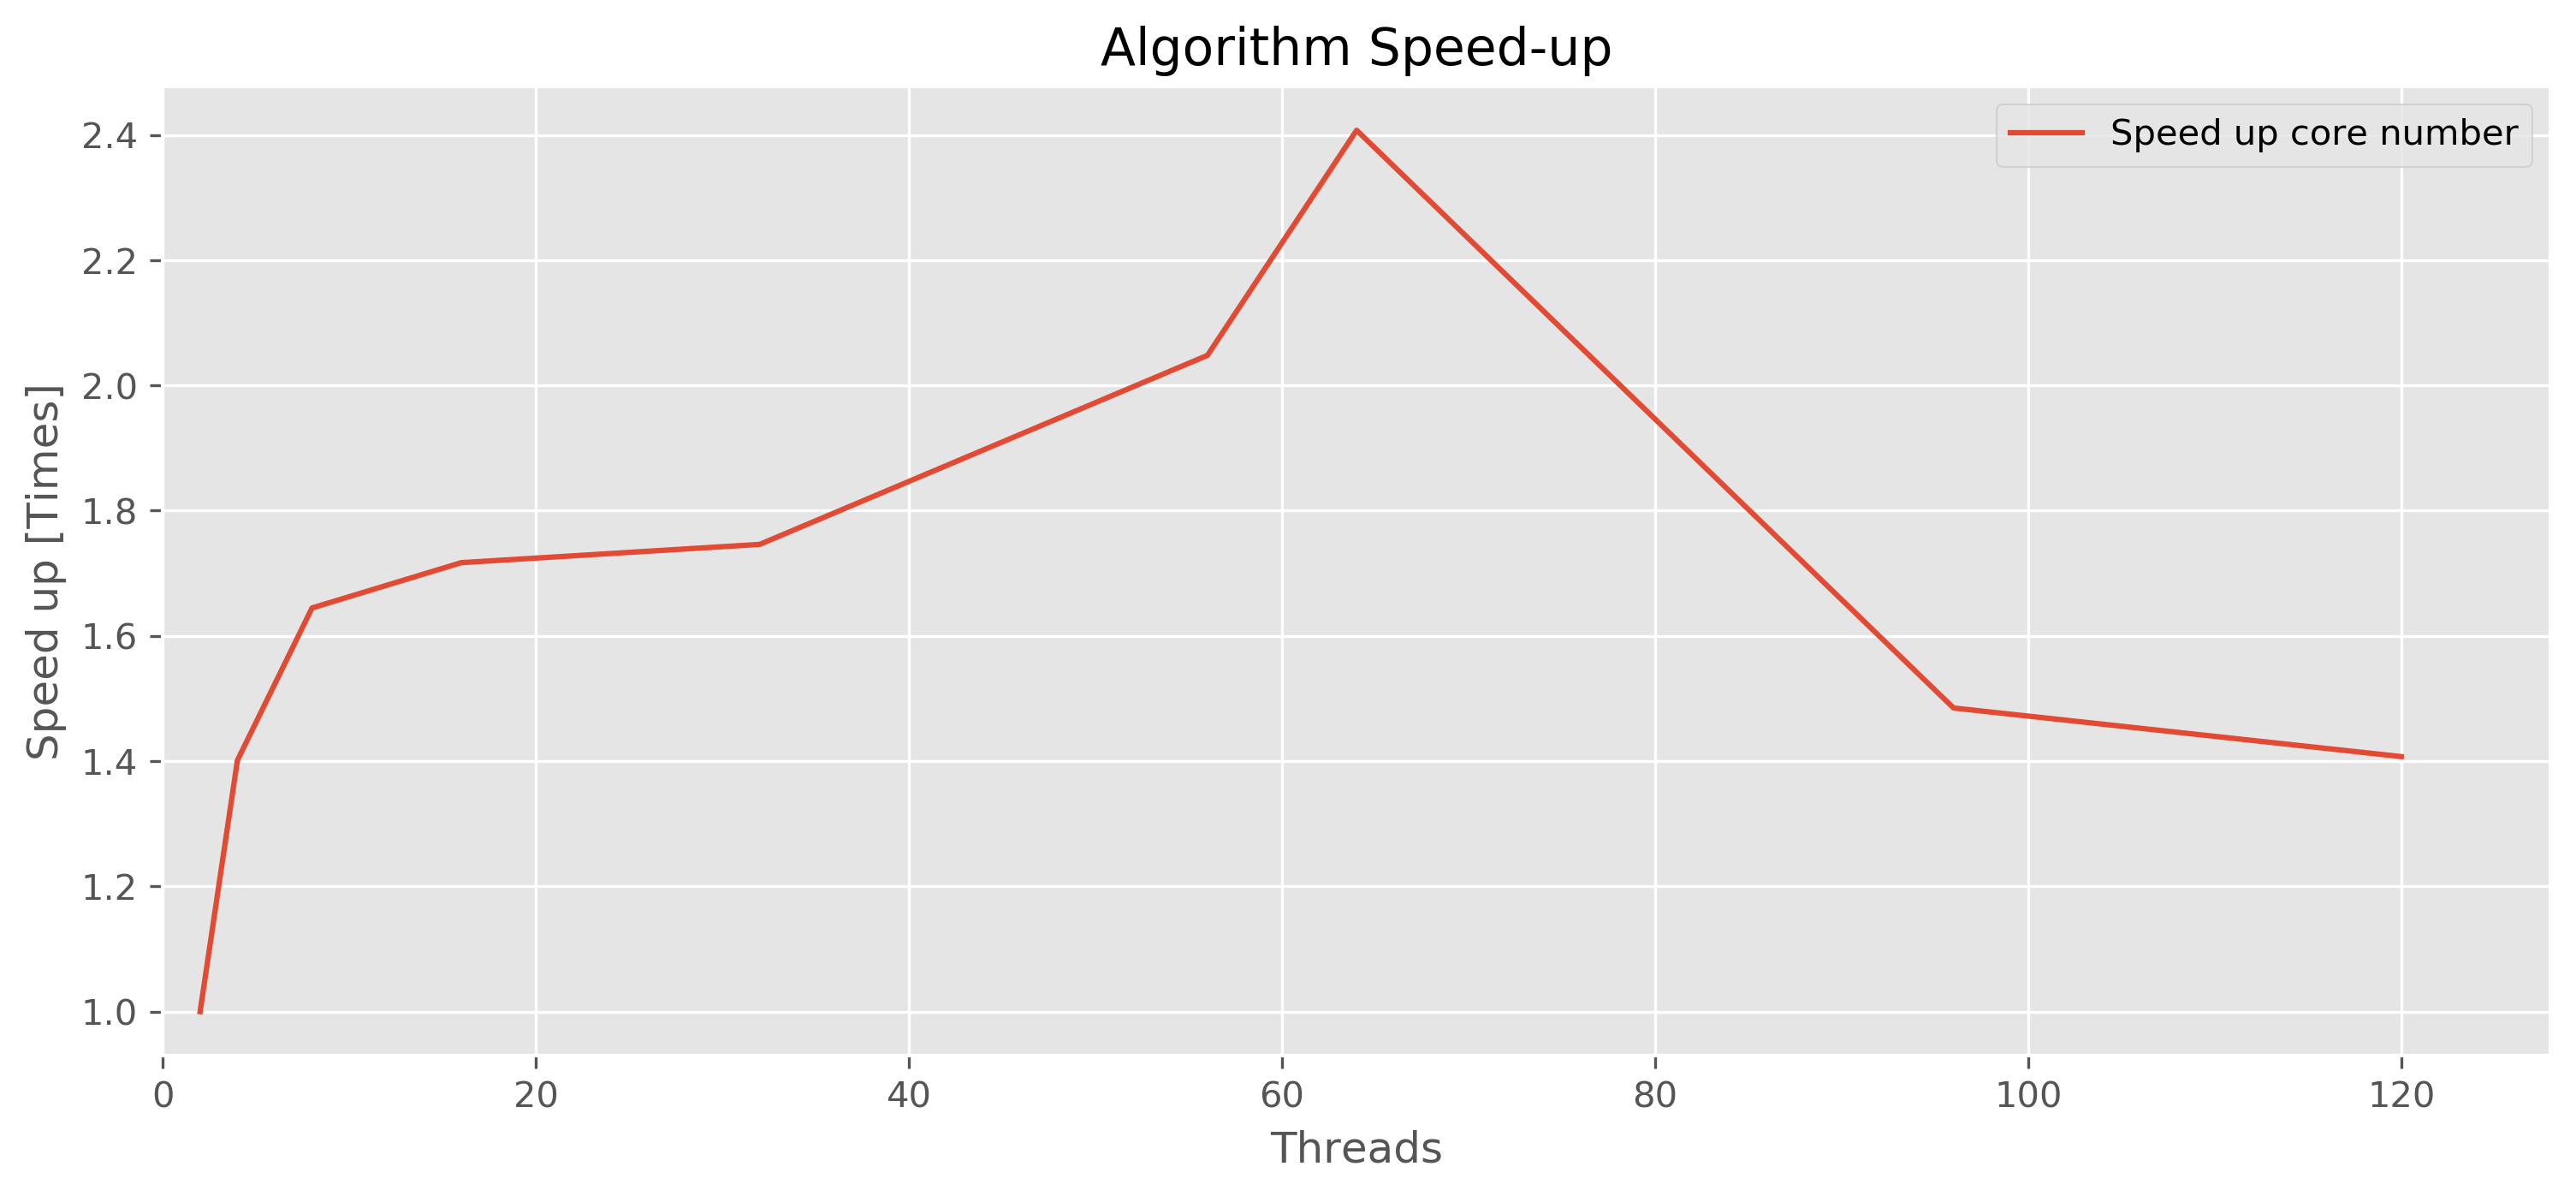

In [7]:
#Speed-up graphic
acel=prom[0]/prom
plt.figure(figsize=(12, 5), dpi=300, facecolor='w', edgecolor='k')
plt.plot(num_cores,acel,label="Speed up core number")
plt.xlim(0,128)
plt.title("Algorithm Speed-up");
plt.xlabel("Threads");
plt.ylabel("Speed up [Times]");
plt.legend();


In [8]:
plt.savefig('SpeedUp.png', dpi=300)

<Figure size 432x288 with 0 Axes>